In [2]:
import pandas as pd

In [3]:
df1= pd.read_excel(r"G:\2023\Hero vired data science\Capton project\Data sets\Customer Details.xlsx")

In [4]:
df1.head()

Name    CustomerID  Age Marital Status  Gender  \
0  Katherine Bettcher    0002-ORFBO   30        Married    Male   
1    Alejandro Graham   0002-ORFBOA   71        Married    Male   
2       Priscilla Ian   0002-ORFBOC   46      Seperated    Male   
3              Ovella  0002-ORFBOCH   42        Married  Female   
4             Juliann   0002-ORFBOH   30        Married    Male   

          Ethnicity         Education  
0         Caucasian            Master  
1             Asian          Bachelor  
2  African American  Senior Secondary  
3         Caucasian  Senior Secondary  
4  African American         Doctorate

In [5]:
df2= pd.read_excel(r"G:\2023\Hero vired data science\Capton project\Data sets\Card Details.xlsx")

In [6]:
df2.head()

CustomerID   Income  Limit  Rating  Cards  Balance
0    0002-ORFBO  105.038   9142     734      3      232
1   0002-ORFBOA   69.820   4223     389      1      924
2   0002-ORFBOC   17.441   2430     253      1       20
3  0002-ORFBOCH   39.368   3829     248      3      813
4   0002-ORFBOH   56.375   2850     258      1      109

In [7]:
df=pd.merge(df1,df2,on="CustomerID")

In [8]:
df.head()

Name    CustomerID  Age Marital Status  Gender  \
0  Katherine Bettcher    0002-ORFBO   30        Married    Male   
1    Alejandro Graham   0002-ORFBOA   71        Married    Male   
2       Priscilla Ian   0002-ORFBOC   46      Seperated    Male   
3              Ovella  0002-ORFBOCH   42        Married  Female   
4             Juliann   0002-ORFBOH   30        Married    Male   

          Ethnicity         Education   Income  Limit  Rating  Cards  Balance  
0         Caucasian            Master  105.038   9142     734      3      232  
1             Asian          Bachelor   69.820   4223     389      1      924  
2  African American  Senior Secondary   17.441   2430     253      1       20  
3         Caucasian  Senior Secondary   39.368   3829     248      3      813  
4  African American         Doctorate   56.375   2850     258      1      109

# Q-1 Utilize descriptive statistics to understand the dataset's key features and distributions.


In [9]:
from scipy.stats import describe

In [10]:
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

                Age        Income         Limit        Rating         Cards  \
count  32547.000000  32547.000000  3.254700e+04  32547.000000  32547.000000   
mean      55.476419     46.490372  4.419522e+03    326.720159      2.906658   
std       16.990896     37.140511  2.202441e+03    136.146945      1.325485   
min       25.000000     10.627000  1.134000e+03    119.000000      1.000000   
25%       42.000000     20.661500  2.727000e+03    224.000000      2.000000   
50%       55.000000     33.469000  4.178000e+03    316.000000      3.000000   
75%       69.000000     58.075000  5.636000e+03    405.000000      4.000000   
max       86.000000    160.231000  1.120000e+04    805.000000      7.000000   
var      288.690550   1379.417591  4.850747e+06  18535.990635      1.756911   
skew       0.036556      1.547238  7.630435e-01      0.643587      0.575143   
kurt      -1.049545      1.620565  4.046132e-01      0.229935     -0.023099   

             Balance  
count   32547.000000  
mean 

C:\Users\Neha\AppData\Local\Temp\ipykernel_16808\1826681909.py:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stats.loc['var'] = df.var().tolist()
C:\Users\Neha\AppData\Local\Temp\ipykernel_16808\1826681909.py:3: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stats.loc['skew'] = df.skew().tolist()
C:\Users\Neha\AppData\Local\Temp\ipykernel_16808\1826681909.py:4: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None

In [11]:
num_col= df.describe(exclude="object")
num_col

Age        Income         Limit        Rating         Cards  \
count  32547.000000  32547.000000  32547.000000  32547.000000  32547.000000   
mean      55.476419     46.490372   4419.522322    326.720159      2.906658   
std       16.990896     37.140511   2202.441042    136.146945      1.325485   
min       25.000000     10.627000   1134.000000    119.000000      1.000000   
25%       42.000000     20.661500   2727.000000    224.000000      2.000000   
50%       55.000000     33.469000   4178.000000    316.000000      3.000000   
75%       69.000000     58.075000   5636.000000    405.000000      4.000000   
max       86.000000    160.231000  11200.000000    805.000000      7.000000   

            Balance  
count  32547.000000  
mean     447.894706  
std      454.205934  
min        0.000000  
25%        5.000000  
50%      331.000000  
75%      749.000000  
max     1597.000000

In [12]:
col_names=num_col.columns
col_names

Index(['Age', 'Income', 'Limit', 'Rating', 'Cards', 'Balance'], dtype='object')

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

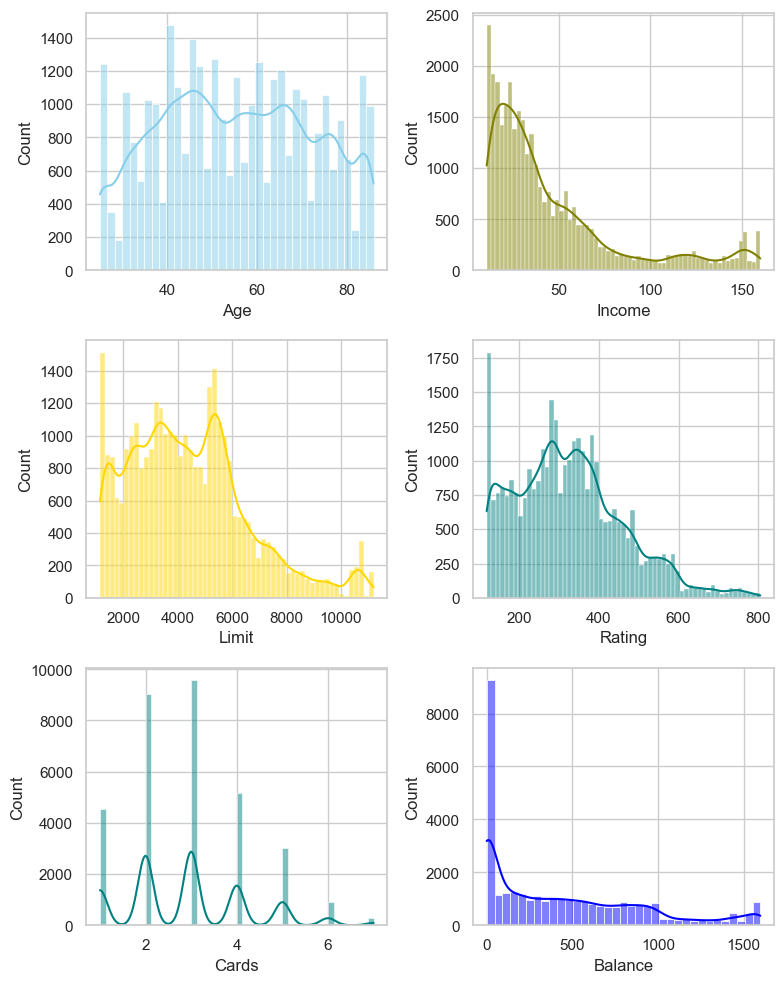

In [14]:
sns.set(style="whitegrid")  
fig,axs = plt.subplots(3,2, figsize = (8,10))
sns.histplot(data=df, x="Age", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="Income", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="Limit", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="Rating", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x="Cards", kde=True, color="teal", ax=axs[2, 0])
sns.histplot(data=df, x="Balance", kde=True, color="blue", ax=axs[2, 1])
fig.tight_layout()

In [15]:
catCols = df.select_dtypes("object").columns
catCols= list(set(catCols))
catCols

['Education', 'CustomerID', 'Ethnicity', 'Gender', 'Marital Status', 'Name']

<Axes: ylabel='Education'>

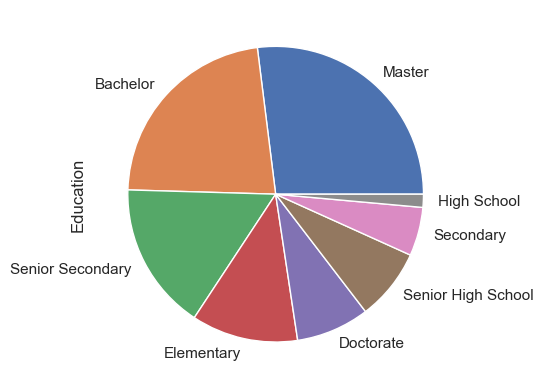

In [19]:
data=df['Education'].value_counts()
data.plot(kind='pie')

<Axes: ylabel='Ethnicity'>

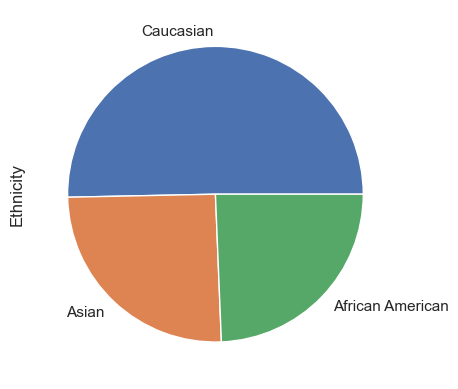

In [20]:
data=df['Ethnicity'].value_counts()
data.plot(kind='pie')

<Axes: ylabel='Gender'>

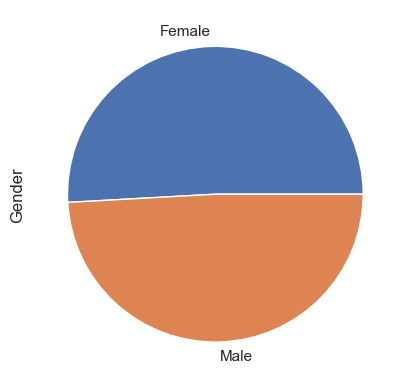

In [21]:
data=df['Gender'].value_counts()
data.plot(kind='pie')

<Axes: ylabel='Marital Status'>

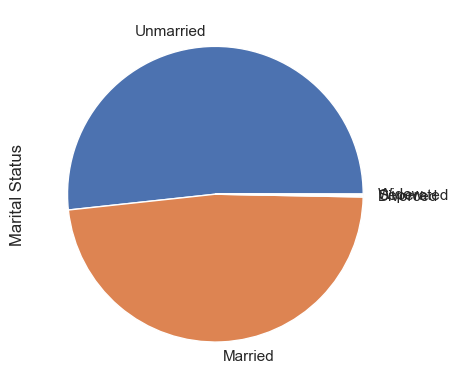

In [22]:
data=df['Marital Status'].value_counts()
data.plot(kind='pie')

Age
Skew : 0.04


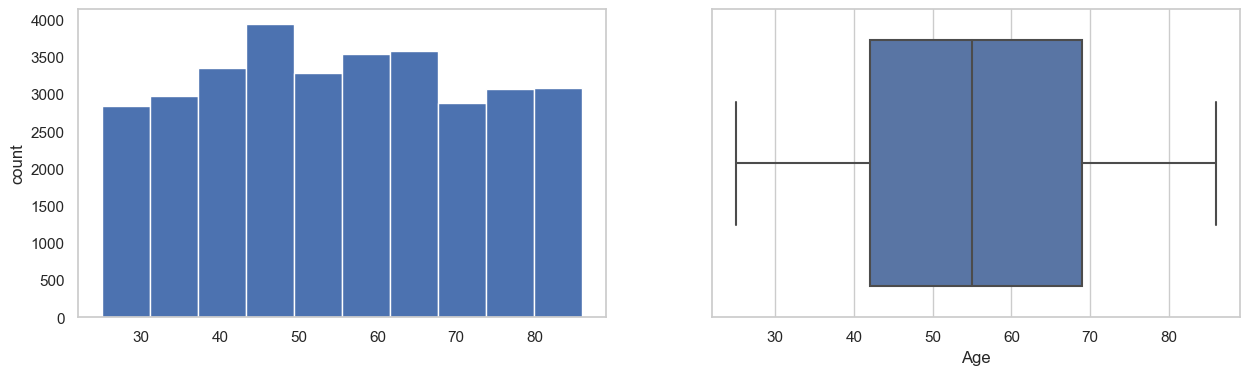

Income
Skew : 1.55


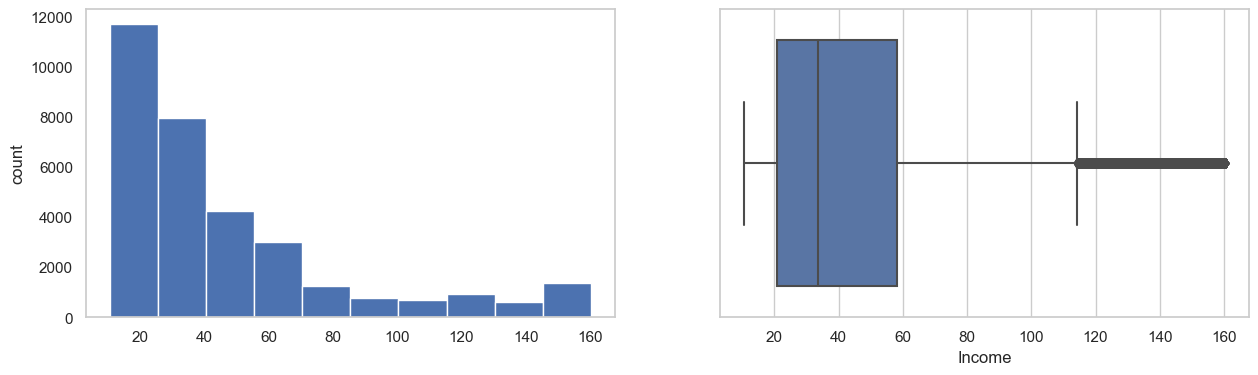

Limit
Skew : 0.76


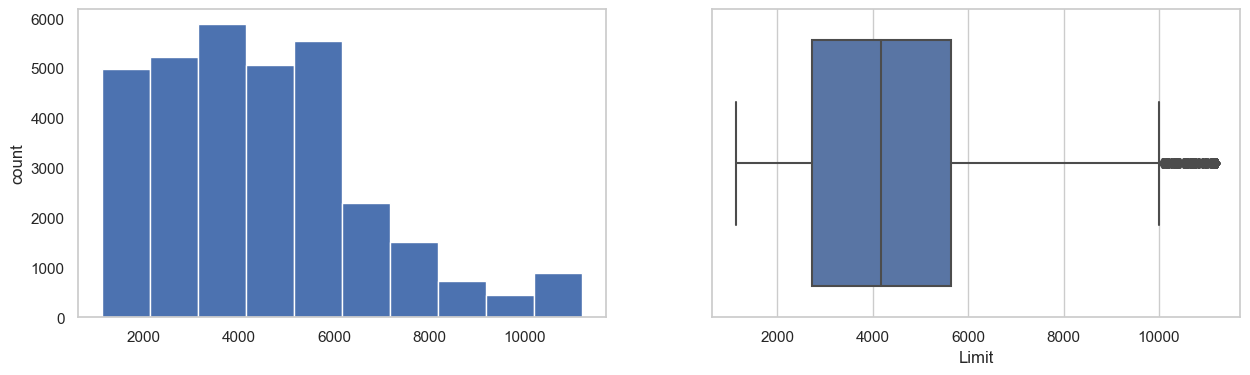

Rating
Skew : 0.64


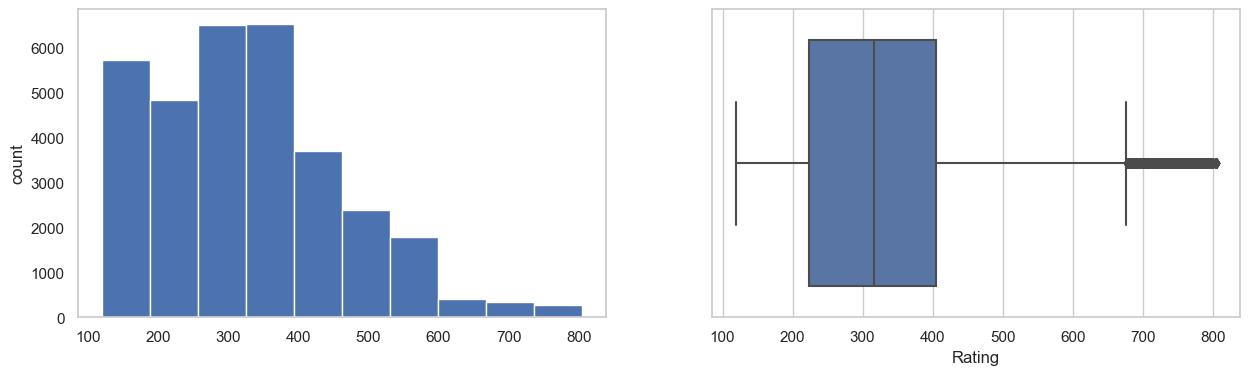

Cards
Skew : 0.58


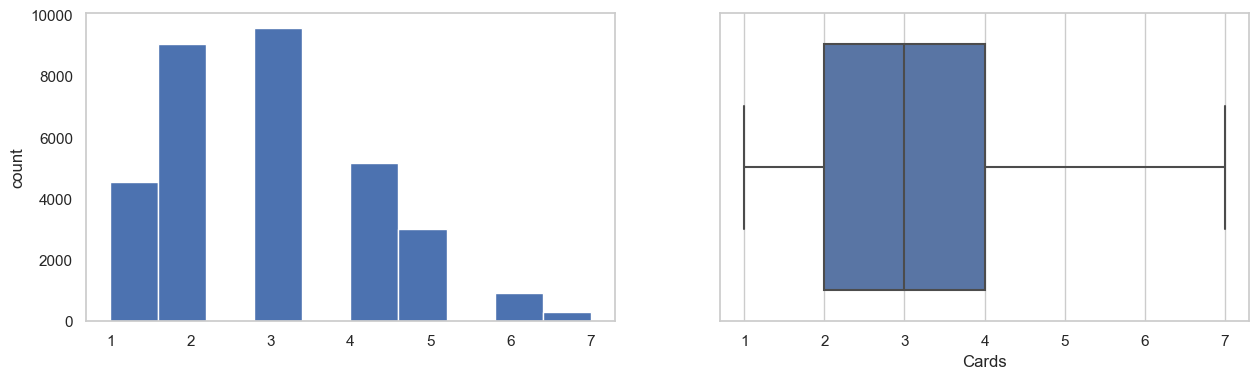

Balance
Skew : 0.9


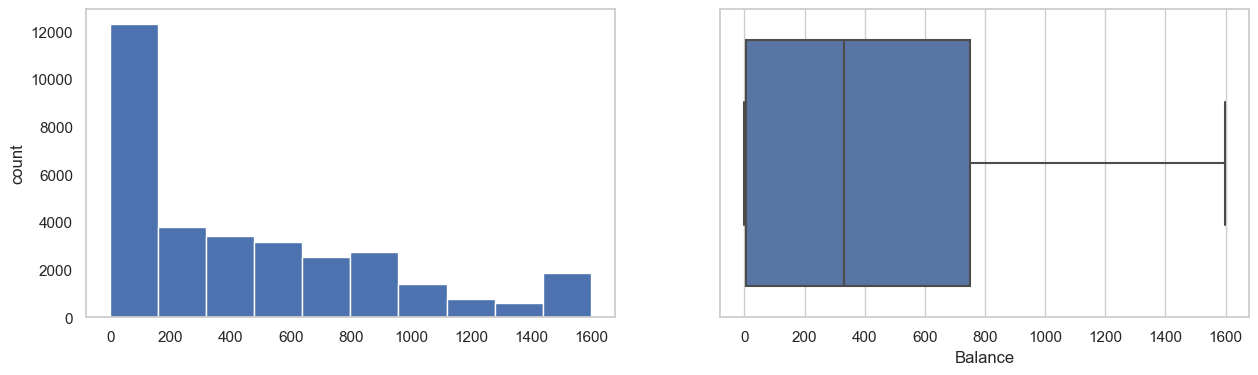

In [27]:
for col in col_names:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

In [33]:
import numpy as np
def log_transform(df,col):
    for colname in col_names:
        if (df[colname] == 1.0).all():
              df[colname + '_log'] = np.log(df[colname]+1)
        else:
            df[colname + '_log'] = np.log(df[colname])
    data.info()

In [34]:
col_names

Index(['Age', 'Income', 'Limit', 'Rating', 'Cards', 'Balance'], dtype='object')

In [35]:
log_transform(df,['Income', 'Limit', 'Rating', 'Cards', 'Balance'])

<class 'pandas.core.series.Series'>
Index: 5 entries, Unmarried to Widow
Series name: Marital Status
Non-Null Count  Dtype
--------------  -----
5 non-null      int64
dtypes: int64(1)
memory usage: 252.0+ bytes


C:\Users\Neha\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


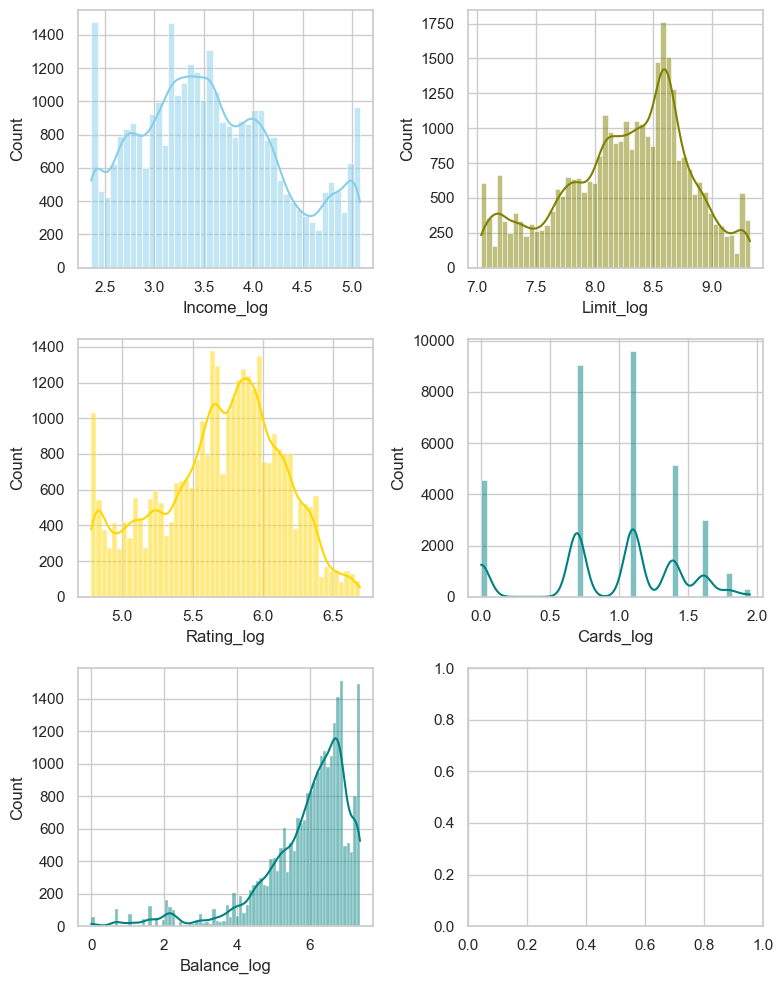

In [38]:
sns.set(style="whitegrid")  
fig,axs = plt.subplots(3,2, figsize = (8,10))
sns.histplot(data=df, x="Income_log", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="Limit_log",kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="Rating_log", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="Cards_log", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x="Balance_log", kde=True, color="teal", ax=axs[2, 0])
fig.tight_layout()

<Figure size 1300x1700 with 0 Axes>

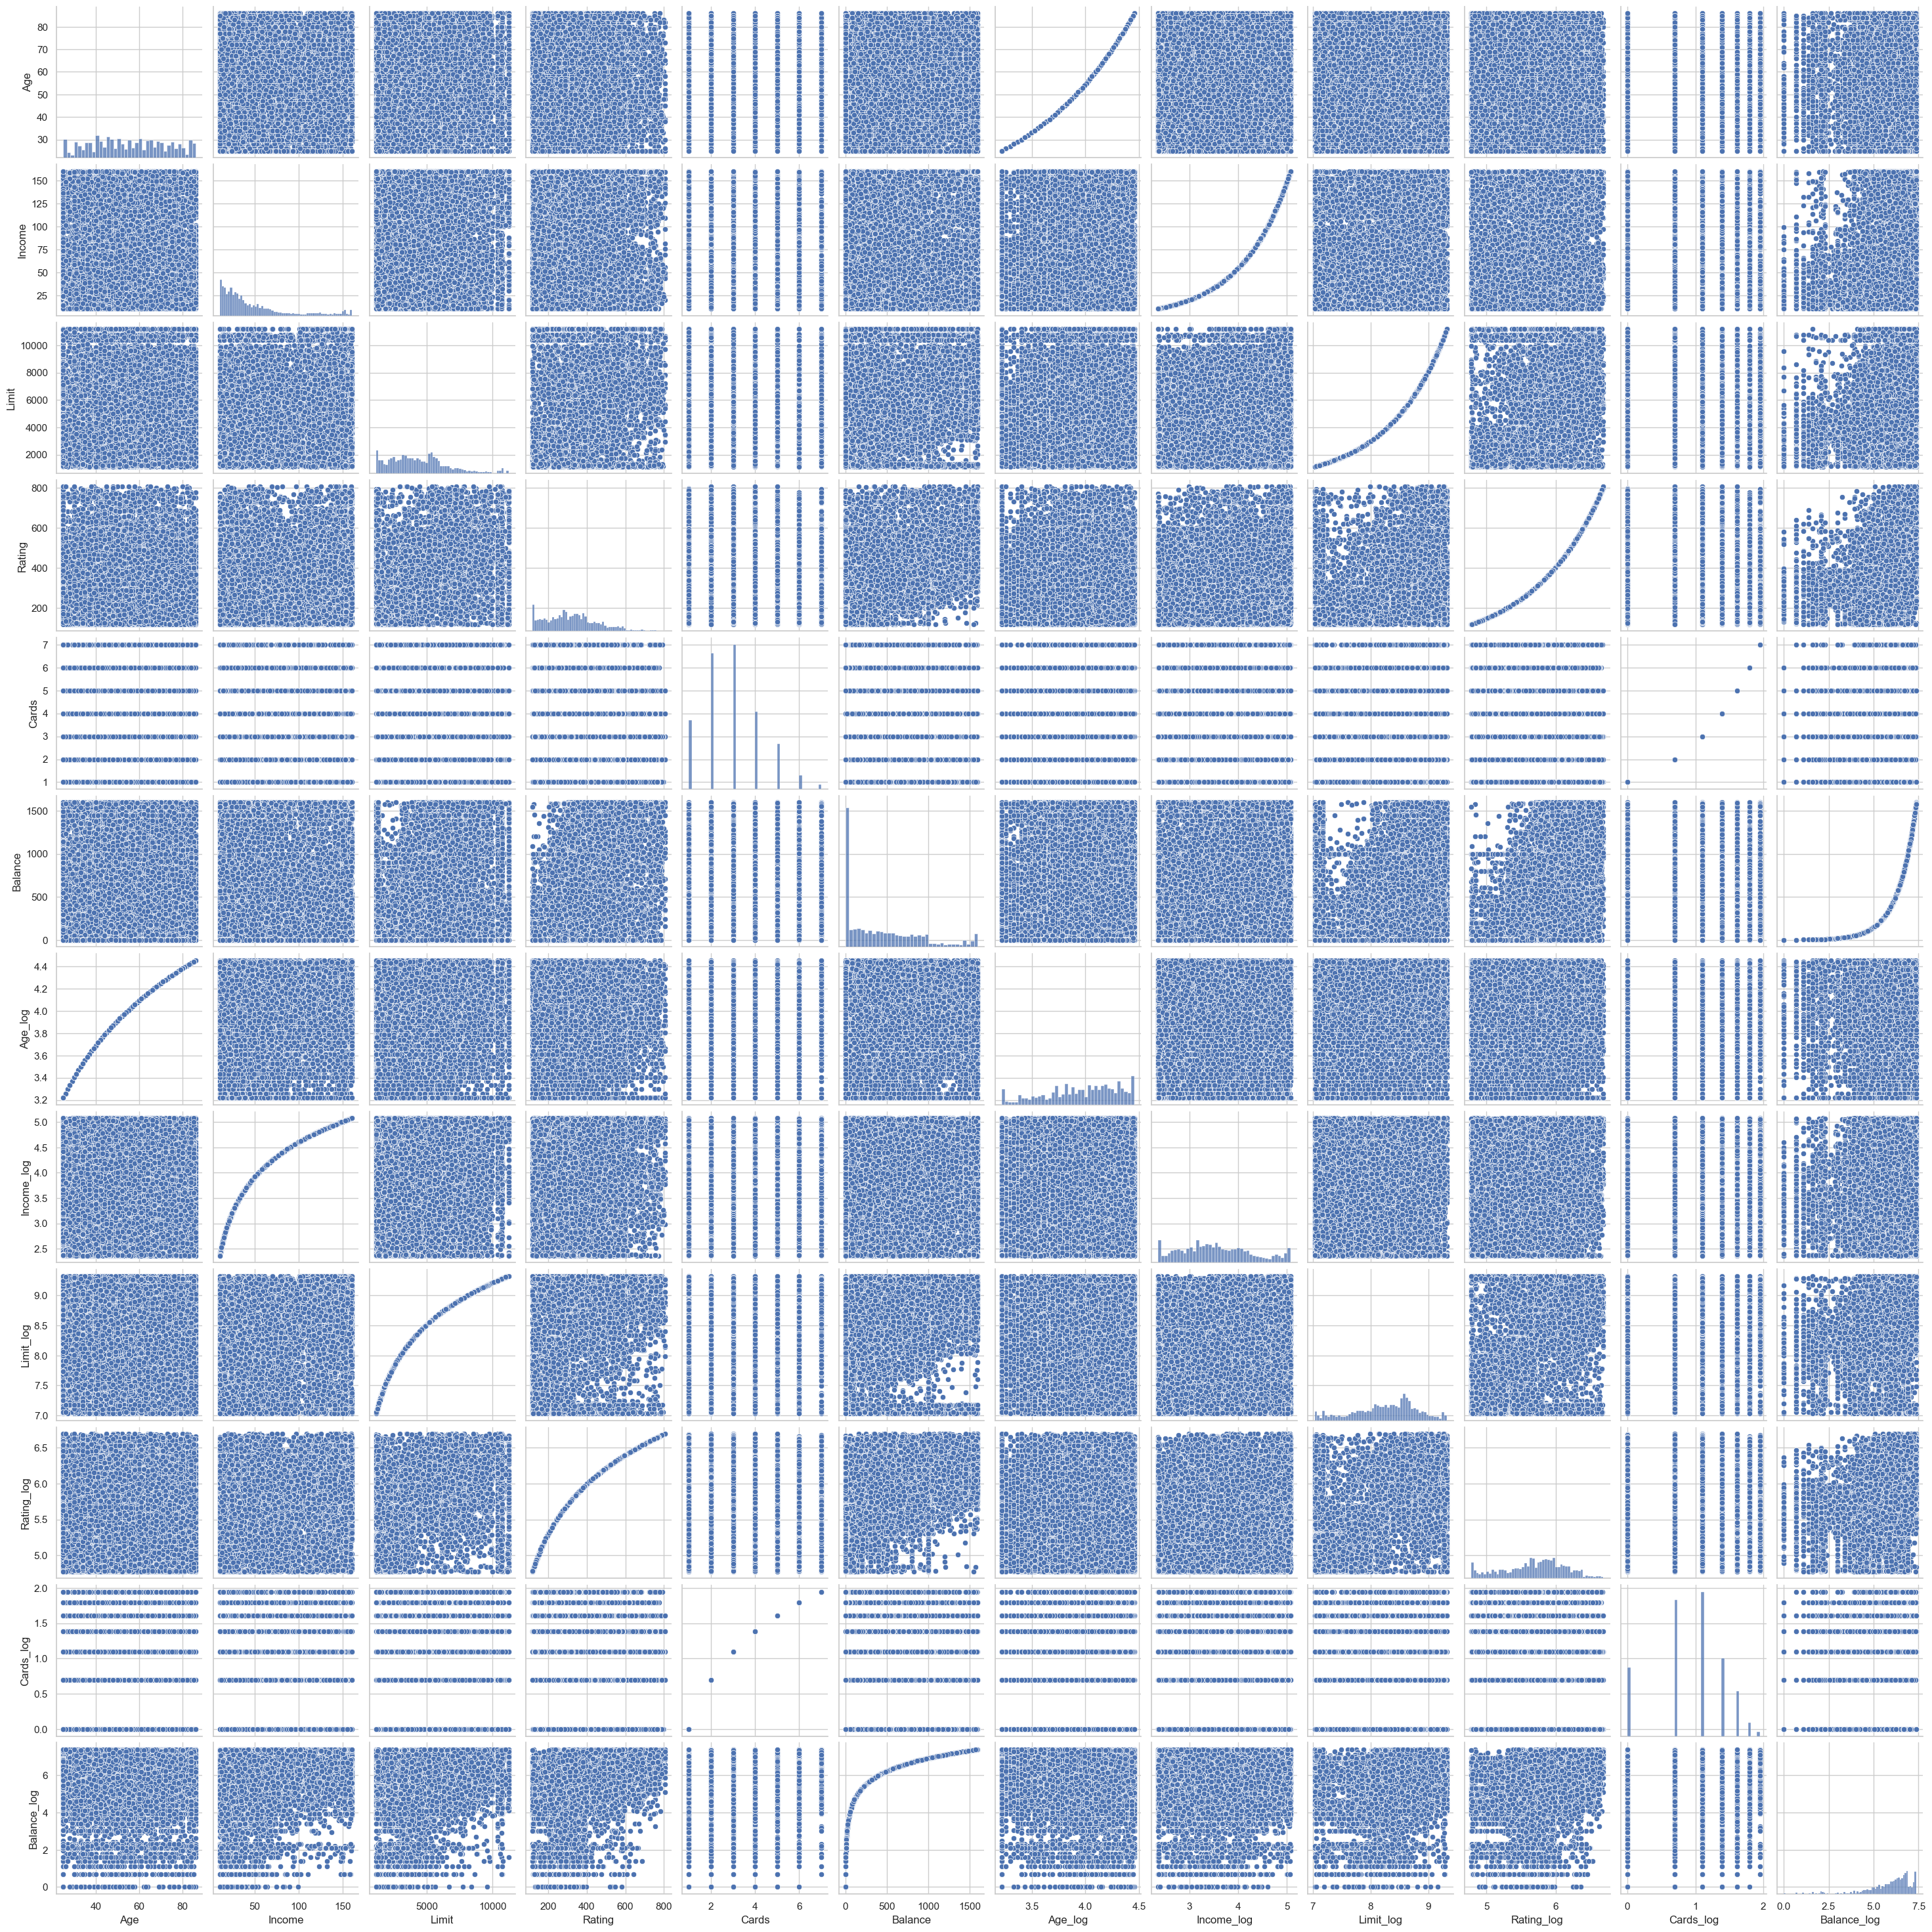

In [39]:
plt.figure(figsize=(13,17))
sns.pairplot(df)
plt.show()

In [49]:
df = pd.DataFrame(df)

corr_matrix = df.corr()
print(corr_matrix)

                  Age    Income     Limit    Rating     Cards   Balance  \
Age          1.000000 -0.005523 -0.004586 -0.002299  0.001001  0.005424   
Income      -0.005523  1.000000  0.261745  0.243290  0.024212  0.176111   
Limit       -0.004586  0.261745  1.000000  0.629210  0.026519  0.539445   
Rating      -0.002299  0.243290  0.629210  1.000000  0.043929  0.598677   
Cards        0.001001  0.024212  0.026519  0.043929  1.000000  0.037445   
Balance      0.005424  0.176111  0.539445  0.598677  0.037445  1.000000   
Age_log      0.986280 -0.005785 -0.003739 -0.001491  0.000749  0.006078   
Income_log  -0.003922  0.932502  0.247419  0.238434  0.014557  0.163250   
Limit_log   -0.004971  0.184112  0.951268  0.643409  0.024460  0.546731   
Rating_log  -0.002295  0.207890  0.641374  0.967377  0.043142  0.608964   
Cards_log    0.001455  0.017285  0.006630  0.020699  0.958778  0.015991   
Balance_log  0.010108  0.118720  0.352868  0.391885  0.017237  0.808002   

              Age_log  I

C:\Users\Neha\AppData\Local\Temp\ipykernel_16808\248428314.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [50]:
#H0: There is no difference between card limit of male and female
#v/s H1: There is difference between card limit of male and female 
from scipy.stats import ttest_ind


In [51]:
group1 = df[df['Gender']=='Male']
group2 = df[df['Gender']=='Female']

In [52]:
ttest_ind(group1['Limit_log'], group2['Limit_log'], equal_var=False)

Ttest_indResult(statistic=0.6385289625190271, pvalue=0.5231339065895095)

In [ ]:
# p-value = 0.523 >0.05. We can not reject H0. 
#Hence, there is no significant difference between card limit of male and female 

In [ ]:
#H0: There is no difference between rate of male and female
#v/s H1: There is difference between rate of male and female 

In [53]:
ttest_ind(group1['Rating_log'], group2['Rating_log'], equal_var=False)

Ttest_indResult(statistic=-1.329754964615052, pvalue=0.18360835146065477)

In [ ]:
# p-value = 0.183 >0.05. We can not reject H0. 
#Hence, there is no significant difference between rating  of male and female 

In [ ]:
#H0: There is no difference between Income of male and female
#v/s H1: There is difference between Income of male and female 

In [54]:
ttest_ind(group1['Income_log'], group2['Income_log'], equal_var=False)

Ttest_indResult(statistic=0.027106877144389134, pvalue=0.9783746559662951)

In [ ]:
# p-value = 0.9784 >0.05. We can not reject H0. 
#Hence, there is no significant difference between income  of male and female

In [ ]:
#ONe-Way ANOVA
#H0: There is no differnce in the income of people from different ethnicity
#v/s H1: There is difference in the income of people from different ethnicity

In [55]:
from scipy.stats import f_oneway

In [59]:
group11 = df[df['Ethnicity']=='Asian']
group21 = df[df['Ethnicity']=='Caucasian']
group31 = df[df['Ethnicity']=='African American']

In [61]:
f_oneway(group11['Income_log'], group21['Income_log'],group31['Income_log'])

F_onewayResult(statistic=2.19836194318442, pvalue=0.1110012899913746)

In [ ]:
# p-value = 0.111 >0.05. We can not reject H0. 
#Hence, there is no significant difference between income of people from different ethnicity 

In [62]:
#H0: There is no differnce in the card limit of people from different ethnicity
#v/s H1: There is difference in the card limit of people from different ethnicity

In [63]:
f_oneway(group11['Limit_log'], group21['Limit_log'],group31['Limit_log'])

F_onewayResult(statistic=0.3324528205204959, pvalue=0.7171649389877154)

In [ ]:
# p-value = 0.717 >0.05. We can not reject H0. 
#Hence, there is no significant difference between card limit of people from different ethnicity 

In [64]:
#H0: There is no differnce in the Rating of people from different ethnicity
#v/s H1: There is difference in the Rating of people from different ethnicity

In [65]:
f_oneway(group11['Rating_log'], group21['Rating_log'],group31['Rating_log'])

F_onewayResult(statistic=0.1980950518710104, pvalue=0.8202928682523021)

In [ ]:
# p-value = 0.820 >0.05. We can not reject H0. 
#Hence, there is no significant difference between Rating of people from different ethnicity 

In [ ]:
#H0: There is no differnce in the Balance of people from different ethnicity
#v/s H1: There is difference in the Balance of people from different ethnicity

In [67]:
f_oneway(group11['Balance'], group21['Balance'],group31['Balance'])

F_onewayResult(statistic=2.3482867053369576, pvalue=0.09554888519355649)

In [ ]:
# p-value = 0.0955 >0.05. We can not reject H0. 
#Hence, there is no significant difference between Balance of people from different ethnicity 

In [68]:
group111 = df[df['Education']=='Bachelor']
group211 = df[df['Education']=='Master']
group311 = df[df['Education']=='Senior Secondary']
group411 = df[df['Education']=='Doctorate']
group511 = df[df['Education']=='Elementary']
group611 = df[df['Education']=='Senior High School']
group711 = df[df['Education']=='Secondary']
group811 = df[df['Education']=='High School']


In [ ]:
#H0: There is no differnce in the Balance of people from different educational background
#v/s H1: There is difference in the Balance of people from different educational background

In [69]:
f_oneway(group111['Balance'], group211['Balance'],group311['Balance'], group411['Balance'],group511['Balance'], group611['Balance'],group711['Balance'],group811['Balance'])

F_onewayResult(statistic=0.9379788486151617, pvalue=0.4754536460033304)

In [ ]:
# p-value = 0.475 >0.05. We can not reject H0. 
#Hence, there is no significant difference between Balance of people from different educational background

In [ ]:
#H0: There is no differnce in the Balance of people from different educational background
#v/s H1: There is difference in the Balance of people from different educational backgrou

In [70]:
f_oneway(group111['Income'], group211['Income'],group311['Income'], group411['Income'],group511['Income'], group611['Income'],group711['Income'],group811['Income'])

F_onewayResult(statistic=0.733043680619043, pvalue=0.6439442813490242)

In [ ]:
# p-value = 0.644 >0.05. We can not reject H0. 
#Hence, there is no significant difference between Income of people from different educational background

In [ ]:
#H0: There is no differnce in the Limit from different educational background
#v/s H1: There is difference in the Limit from different educational backgrou

In [71]:
f_oneway(group111['Limit'], group211['Limit'],group311['Limit'], group411['Limit'],group511['Limit'], group611['Limit'],group711['Limit'],group811['Limit'])

F_onewayResult(statistic=0.467281816946877, pvalue=0.8588463823660621)

In [ ]:
# p-value = 0.859 >0.05. We can not reject H0. 
#Hence, there is no significant difference between card limit of people from different educational backround

In [ ]:
#H0: There is no differnce in the Rating from different educational background
#v/s H1: There is difference in the Rating of people from different educational backgrou

In [72]:
f_oneway(group111['Rating'], group211['Rating'],group311['Rating'], group411['Rating'],group511['Rating'], group611['Rating'],group711['Rating'],group811['Rating'])

F_onewayResult(statistic=1.3688530798366458, pvalue=0.2135681844739388)

In [73]:
# p-value = 0.214 >0.05. We can not reject H0. 
#Hence, there is no significant difference between rating of people from different educational backround